# Clustering

Kümeleme, benzer özelliklere sahip verileri gruplandırarak, veriler arasında yapı ve örüntüleri ortaya çıkarmayı amaçlayan bir makine öğrenmesi tekniğidir.

<div class="alert alert-block alert-info">
<b>Not:</b><br> 
* Regression başarısı: R<sup>2</sup> & RMSE<br>
* Classification başarısı: Accuracy, F1 score, Classification Report & Confusion Matrix<br>
* Clustering de **başarı yok** ancak dikkat edilecek skor: *Silhouette Score*
</div>


In [1]:
import pandas as pd

import warnings
warnings.simplefilter("ignore")

<div class="alert alert-block alert-success">
Excel dosyasını okumak için xlrd paketine ihtiyaç duyulabilir. Bunun için aşağıdaki kodu çalıştırarak kurabilirsiniz.
</div>

```python
pip install xlrd
```

In [2]:
df=pd.read_excel("cars.xls")

# Bu veri setinde özelliklerine göre gruplandırma yapmak amacıyla otomobil bilgileri yer almaktadır.

### Keşfedici Veri Analizi (EDA)

<div class="alert alert-block alert-info">
EDA işlemleri ile ilgili detaylı bilgi için <a href="../../Data-Preprocessing/03-Exploratory-Data-Analysis/Exploratory-Data-Analysis.ipynb" target="_blank">buraya</a> bakabilirsiniz.
</div>

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


**Veri setindeki alanlar:**
* Price: Arabanın fiyatı.
* Mileage: Arabanın şu anki kilometresi (mil cinsinden)
* Make: Arabanın markası
* Model: Arabanın modeli
* Trim: Arabanın alt modeli
* Type: Arabanın tipi
* Cylinder: Arabadaki silindir sayısı
* Liter: Arabanın motor hacmi
* Doors: Arabanın kapı sayısı
* Cruise: Hız sabitleme özelliği var mı? (1: Evet, 0: Hayır)
* Sound: Ses sitemi var mı? (1: Evet, 0: Hayır)
* Leather: Koltukları deri mi? (1: Evet, 0: Hayır)

## Model Geliştirme

### Özellik Seçimi

In [5]:
#Arabaları gruplandırmak için Fiayt, Kilometre ve Silindir özelliklerini kullanalım
x=df[["Price", "Mileage", "Cylinder"]]

In [6]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


### Kümeleme İşlemi

Kümeleme işlemi için `KMeans` ve `silhouette_score` kütüphaneneleri kullanılır.<br>
* **KMeans**, verileri K sayıda kümeye ayıran ve her kümenin merkezini (centroid) belirleyerek, bu merkezlere en yakın verileri gruplandıran bir kümeleme algoritmasıdır.
* **Silhouette Score** ise bir kümeleme modelinin kalitesini değerlendiren bir ölçüttür; her bir verinin, kendi kümesine ne kadar yakın olduğunu ve diğer kümelerden ne kadar uzakta olduğunu belirleyerek, kümeleme sonuçlarının ne kadar iyi olduğunu gösterir. 

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
# Veri setini 4 gruba ayırmak için modelimizi oluşturalım
model=KMeans(4)

In [9]:
model=model.fit(x)
tahmin=model.predict(x)

In [10]:
# Oluşan kümeleri ifade edecek Cluster isminde yeni bir alan oluşturalım.
x["Cluster"]=tahmin

In [11]:
x.head()

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,0
4,16339.170324,19832,6,0


In [12]:
silhouette_score(x, tahmin)

0.3383730047276371

<div class="alert alert-block alert-danger"><b>Uyarı:</b> Buradaki değer (`silhouette_score`) modelin başarısı değildir. Tek başına bir anlam ifade etmez.</div>

### Veri Görselleştirme

<div class="alert alert-block alert-info">
Veri görselleştirme işlemleri ile ilgili detaylı bilgi için <a href="../../Data-Preprocessing/02-Data-Visualization/Data-Visualization.ipynb" target="_blank">buraya</a> bakabilirsiniz.
</div>

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

<Axes: xlabel='Cluster', ylabel='count'>

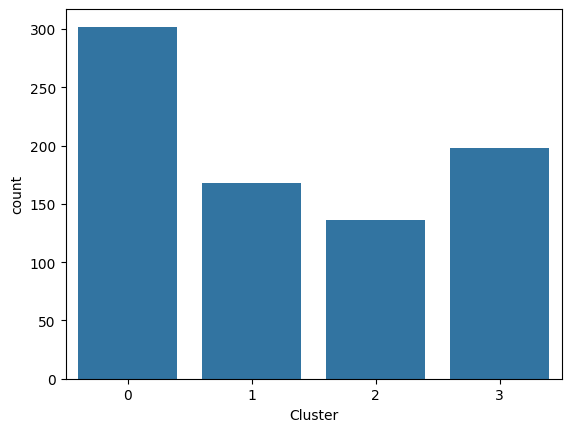

In [14]:
# Bu grafik herbir kümede kaç adet araba olduğunu göstermektedir
sns.countplot(x=x["Cluster"])

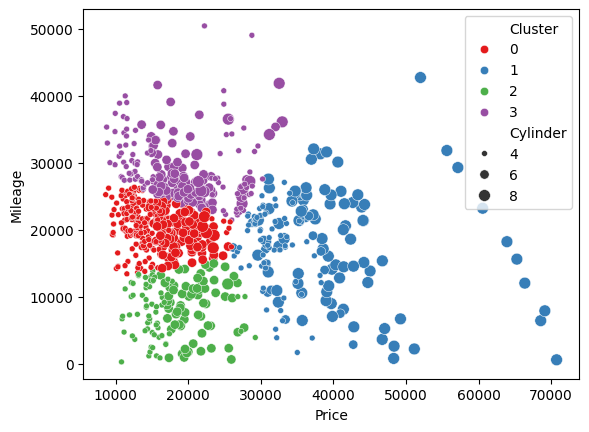

In [15]:
# Bu grafik Kilometre ve Fiyat değerlerinin dağılımını ilgili kümeleri dikkate alarak göstermektedir.
sns.scatterplot(x=x['Price'], y=x['Mileage'], hue=x['Cluster'], size=x['Cylinder'], palette='Set1');

### Elbow Metodu

Yukarıda `silhouette_score` için tek başına bir anlam ifade etmez ve modelin başarısı değildir, demiştik. O halde küme sayısını 2-9 arasındaki her bir kümelemenin `silhouette_score` değerlerini karşılaştırıp ona göre anlamına bakalım. Bunun için modelin `inertia_` değerlerini kıyaslayacağız. 

**`inertia_`**, KMeans algoritmasında her bir küme için verilerin küme merkezlerine (centroid) olan uzaklıklarının karelerinin toplamını ifade eder. Daha düşük bir değer, kümelerin daha sıkı ve belirgin olduğunu gösterir, yani verilerin küme merkezlerine daha yakın olduğunu belirtir. Bu, modelin genel performansını değerlendirmek için kullanılabilir.

**Elbow metodu**, KMeans gibi kümeleme algoritmalarında en uygun küme sayısını belirlemek için kullanılan bir tekniktir. Bu yöntemde, farklı K değerleri için inertia_ değerleri hesaplanır ve bu değerler bir grafik üzerinde plotlanır.

Grafikte, K sayısı arttıkça inertia_ değerinin azaldığı görülür. Ancak, belirli bir noktadan sonra (genellikle "*dirsek (elbow)*" noktası olarak adlandırılır) azalma hızı yavaşlar. Bu dirsek noktası, en uygun küme sayısını belirlemek için ideal noktadır; çünkü daha fazla küme eklemek, modelin karmaşıklığını artırırken, inertia_ değerindeki azalma çok fazla olmayabilir.

In [16]:
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin= model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    wcss.append(model.inertia_)
    print(str(i), "adet küme için Silhouette Score:", ss1)

2 adet küme için Silhouette Score: 0.4515070109819031
3 adet küme için Silhouette Score: 0.41264495892084474
4 adet küme için Silhouette Score: 0.41407184655161955
5 adet küme için Silhouette Score: 0.3823281014637992
6 adet küme için Silhouette Score: 0.32638496153414825
7 adet küme için Silhouette Score: 0.3555875107506838
8 adet küme için Silhouette Score: 0.34486469829863
9 adet küme için Silhouette Score: 0.34952346173041193


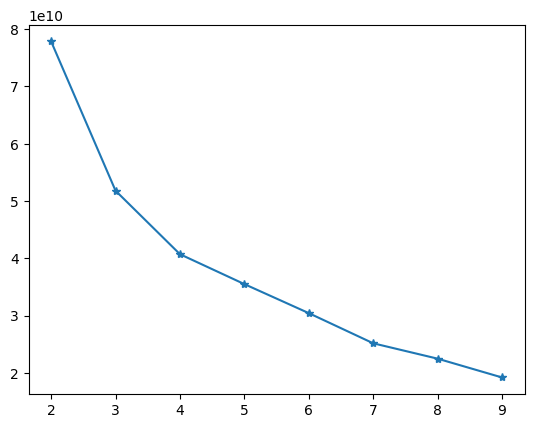

In [17]:
# Bu grafik her bir kümeleme işleminin `inertia_` değerinin dağılımını göstermektedir.
plt.plot(range(2,10), wcss, marker="*")

<div class="alert alert-block alert-success">
Elbow Metodu için daha iyi özelliklere sahip bir grafik olan KElbowVisualizer kütüphanesini kullanabiliriz. Bunun için aşağıdaki paketin kurulu olması gerekmektedir:
</div>

```python
pip install yellowbrick
```

In [18]:
from yellowbrick.cluster import KElbowVisualizer

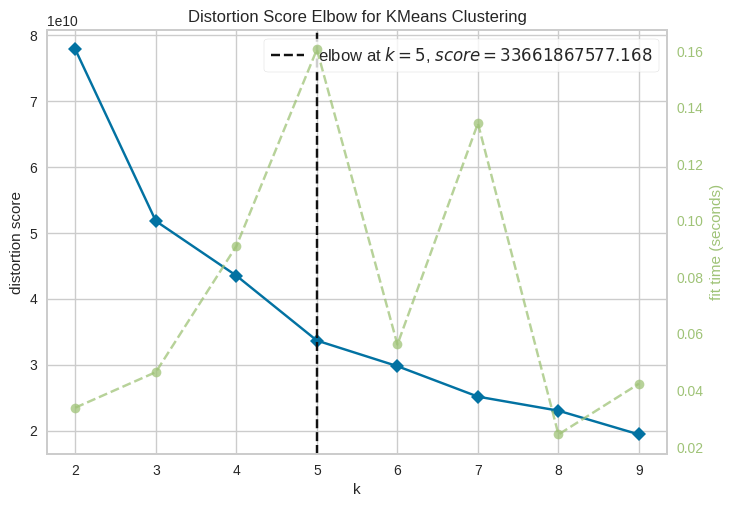

In [19]:
km=KMeans()
vis=KElbowVisualizer(km, k=(2,10))
vis.fit(x)
vis.show();

# Son Söz

Veri seti üzerinde yapılan kümeleme analizinde, farklı küme sayıları için hesaplanan Silhouette Score değerleri incelendi. **KElbowVisualizer** aracı kullanılarak yapılan grafik analizinde, dirsek noktası (*elbow*) **5** olarak belirlendi. Bu sonuç, beş  kümenin veri setinin yapısını en iyi şekilde yansıttığını ve dolayısıyla bu sayının kümeleme analizi için en uygun seçim olduğunu göstermektedir. Sonuç olarak, beş küme ile yapılan kümeleme, veri setindeki örüntüleri anlamak için en etkili yaklaşım olarak öne çıkmaktadır.